- Với bộ dữ liệu chất lượng rượu: wine
- Gộp nhóm 0 và 1 thành 1 loại, để loại 2 riêng (rượu chất lượng tốt) --> bài toán binary (2 lớp)
- Sử dụng 1 trong các thuật toán đã học (logistic, tree, forest, svm, kmeans) để xây dựng mô hình
- Yêu cầu cross-validate tối thiểu 30 lần
- Yêu cầu sử dụng GridSearch để tối ưu tham số

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.datasets import load_wine

In [6]:
wine = load_wine(as_frame = True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
wine_data = wine['frame']
display(wine_data.info(), wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
target_binary = wine_data["target"].gt(1).astype(int)
target_binary

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: target, Length: 178, dtype: int64

In [51]:
categories = wine_data.columns.drop("target")
categories

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [43]:
axs.ravel()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

<AxesSubplot:xlabel='malic_acid', ylabel='nonflavanoid_phenols'>

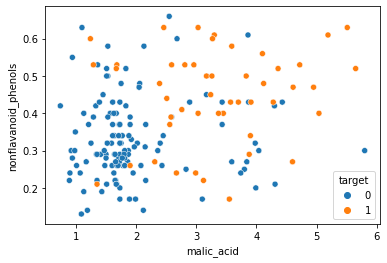

In [47]:
sns.scatterplot(data= wine_data, x= 'malic_acid', y = 'nonflavanoid_phenols', hue = target_binary)

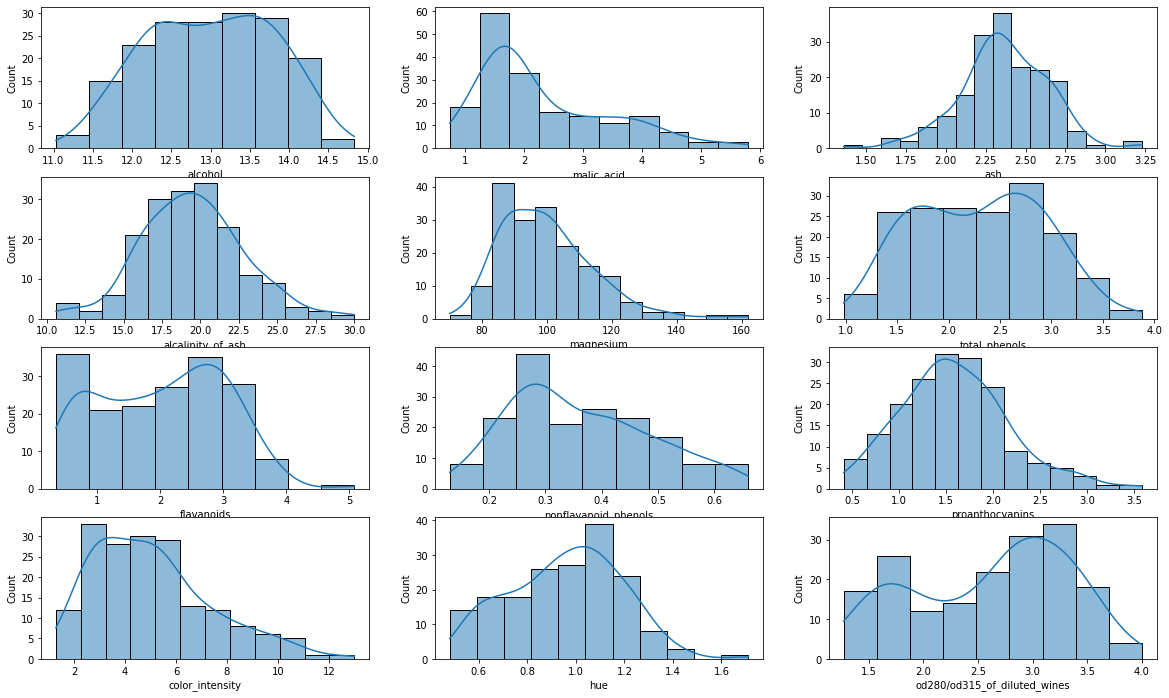

In [45]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(categories, axs.ravel()):
    sns.histplot(data=wine_data, x=col_name, kde=True, ax=ax)

In [56]:
from sklearn.preprocessing import RobustScaler

In [55]:
X, y = wine_data[ categories], target_binary

In [57]:
rcl = RobustScaler()
X_scaler = rcl.fit_transform(np.log1p(X))
X_scaler

array([[ 0.85917126, -0.12353814,  0.20060332, ...,  0.21603422,
         0.75230999,  0.6770158 ],
       [ 0.1131385 , -0.0668929 , -0.65882444, ...,  0.24423447,
         0.43348995,  0.65605412],
       [ 0.08308552,  0.35399903,  0.85858355, ...,  0.18769538,
         0.28025486,  0.8348034 ],
       ...,
       [ 0.16552808,  1.35794038, -0.29394732, ..., -1.22117851,
        -1.11231041,  0.31751803],
       [ 0.09060671,  0.50106624,  0.0289121 , ..., -1.18502202,
        -1.04618813,  0.3263384 ],
       [ 0.78898803,  1.28089744,  1.0424012 , ..., -1.14909081,
        -1.06805912, -0.27253479]])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, target_binary, random_state = 520)
rcl.fit(x_train)

RobustScaler()

In [61]:
rcl.transform(x_test)

array([[ 0.54074074,  0.60544218, -0.21621622,  0.61702128, -0.44444444,
        -1.07      , -0.92073171,  0.38888889, -0.73611111,  1.81090909,
        -0.93333333, -1.00925926, -0.12149533],
       [-1.03703704, -0.13605442,  0.64864865,  1.46808511, -0.55555556,
        -0.5       , -0.35365854,  0.33333333, -0.30555556, -0.72727273,
         1.26666667,  0.40740741, -0.22056075],
       [ 0.31851852, -0.04081633,  0.08108108,  0.29787234,  0.11111111,
         0.28      ,  0.48170732, -0.44444444,  0.41666667,  0.18181818,
         0.2       ,  0.64814815,  0.44859813],
       [-0.33333333,  0.40136054, -0.48648649, -0.12765957, -0.22222222,
        -0.8       , -0.93292683,  1.61111111, -0.86111111,  0.90909091,
        -0.83333333, -1.10185185,  0.02803738],
       [-0.5037037 , -0.47619048, -1.24324324,  0.10638298, -1.11111111,
        -0.31      , -0.11585366, -0.38888889, -0.72222222,  0.02909091,
         0.46666667,  0.65740741, -0.31775701],
       [ 0.6       , -0.244897

In [64]:
X_scaler = pd.DataFrame(X_scaler, columns=X.columns, index=X.index)
X_scaler

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.859171,-0.123538,0.200603,-0.994948,1.327738,0.381901,0.458575,-0.369778,0.933410,0.289007,0.216034,0.752310,0.677016
1,0.113138,-0.066893,-0.658824,-2.446979,0.103365,0.258412,0.322426,-0.496899,-0.420396,-0.104857,0.244234,0.433490,0.656054
2,0.083086,0.353999,0.858584,-0.211677,0.154283,0.381901,0.535514,-0.244627,1.475141,0.300249,0.187695,0.280255,0.834803
3,0.956657,0.064944,0.397154,-0.665868,0.729108,1.129995,0.637123,-0.626055,0.807867,0.816171,-0.316677,0.465741,1.163374
4,0.143107,0.501066,1.374828,0.332955,0.950948,0.381901,0.289095,0.295713,0.364325,-0.125849,0.216034,0.111070,0.129074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.489063,1.870347,0.257167,0.224561,-0.159031,-0.688781,-1.181919,1.017409,-0.794995,0.794779,-1.042621,-0.918369,0.139089
174,0.262145,1.196567,0.341401,0.743204,0.204704,-0.554472,-1.034033,0.524723,-0.215685,0.706680,-0.835403,-1.112310,0.158917
175,0.165528,1.357940,-0.293947,0.113617,1.037085,-0.793521,-1.095910,0.524723,-0.308759,1.267571,-1.221179,-1.112310,0.317518
176,0.090607,0.501066,0.028912,0.113617,1.037085,-0.723298,-1.106435,1.070341,-0.139876,1.110773,-1.185022,-1.046188,0.326338


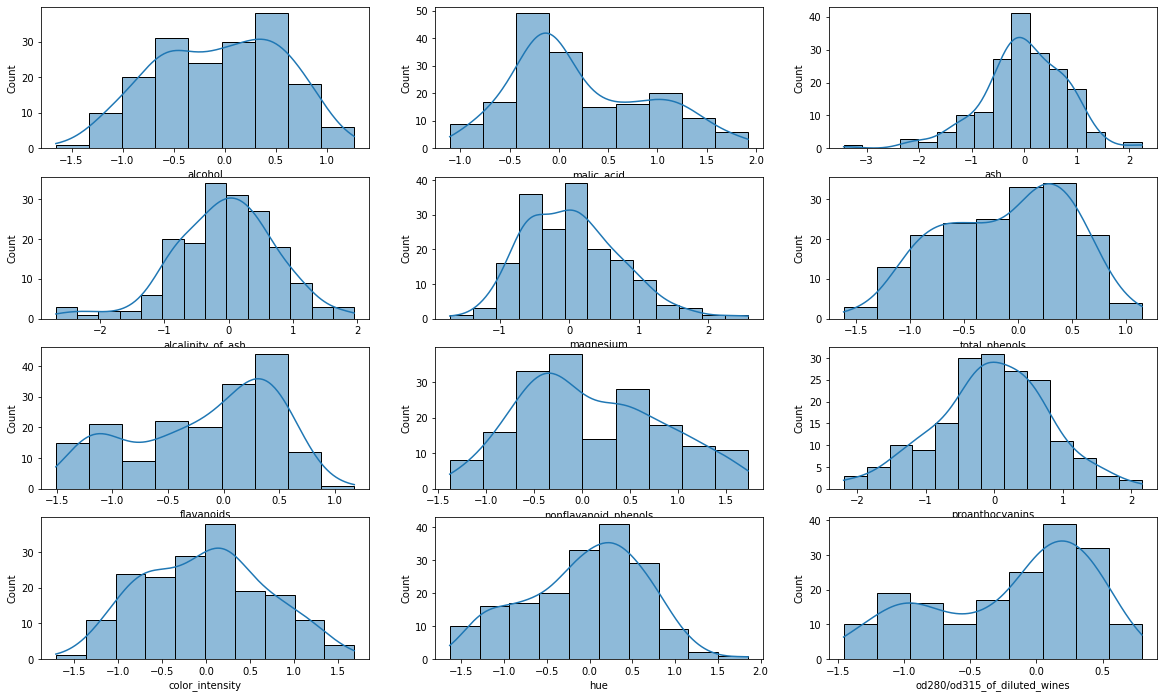

In [65]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(categories, axs.ravel()):
    sns.histplot(data=X_scaler, x=col_name, kde=True, ax=ax)

In [66]:
from sklearn.model_selection import KFold

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, train_size=0.7)

In [69]:
wine_tree = DecisionTreeClassifier()
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
y_predict = wine_tree.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [72]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.88      0.93        16

    accuracy                           0.96        54
   macro avg       0.97      0.94      0.95        54
weighted avg       0.96      0.96      0.96        54



In [74]:
from sklearn.model_selection import cross_validate, cross_val_score

In [78]:
cv = KFold()
tree_score = cross_val_score(wine_tree, X_scaler, y, cv=cv, n_jobs =2)
tree_score

array([1.        , 0.86111111, 1.        , 0.82857143, 0.88571429])

In [80]:
print(f'{tree_score.mean()*100:.2f} accuracy with a standard deviation of {tree_score.std()*100:.2f}')

91.51 accuracy with a standard deviation of 7.17


In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(wine_tree, X_scaler, y, )

In [81]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(wine_tree, X_scaler, y, cv=cv, n_jobs =2, scoring = scoring)
tree_scores

{'fit_time': array([0.0052712 , 0.00337505, 0.02560711, 0.00306511, 0.00352573]),
 'score_time': array([0.03812099, 0.02623487, 0.03423715, 0.01804185, 0.0054152 ]),
 'test_accuracy': array([1.        , 0.86111111, 1.        , 0.85714286, 0.94285714]),
 'test_precision': array([0.        , 0.        , 0.        , 0.72222222, 1.        ]),
 'test_recall': array([0.        , 0.        , 0.        , 1.        , 0.94285714]),
 'test_f1': array([0.        , 0.        , 0.        , 0.83870968, 0.97058824])}

In [82]:
tree_scores = pd.DataFrame(tree_scores)
tree_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.005271,0.038121,1.000000,0.000000,0.000000,0.000000
1,0.003375,0.026235,0.861111,0.000000,0.000000,0.000000
2,0.025607,0.034237,1.000000,0.000000,0.000000,0.000000
3,0.003065,0.018042,0.857143,0.722222,1.000000,0.838710
4,0.003526,0.005415,0.942857,1.000000,0.942857,0.970588


In [84]:
forest = RandomForestClassifier()
forest_scores = cross_val_score(forest, X_scaler, y, cv=cv, n_jobs =2)

In [88]:
forest_score = cross_validate(forest, X_scaler, y, cv=cv, n_jobs =2, scoring =scoring)
forest_score = pd.DataFrame(forest_score)
forest_score

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.513996,0.080177,1.000000,0.0,0.000000,0.000000
1,0.463109,0.055019,0.861111,0.0,0.000000,0.000000
2,0.406348,0.034847,0.972222,0.0,0.000000,0.000000
3,0.364911,0.038985,1.000000,1.0,1.000000,1.000000
4,0.349918,0.044949,0.857143,1.0,0.857143,0.923077


<AxesSubplot:xlabel='test_accuracy', ylabel='test_f1'>

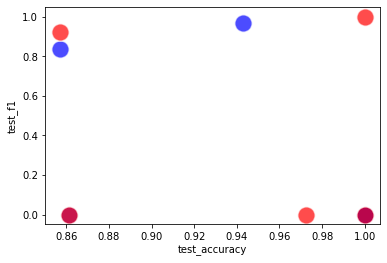

In [92]:
sns.scatterplot(data=tree_scores, x = "test_accuracy", y ="test_f1", s=300, alpha = 0.7, color= "blue")
sns.scatterplot(data=forest_score, x = "test_accuracy", y ="test_f1", s=300, alpha = 0.7, color ="red")

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {
    "max_depth": [3,5] ,
    "max_features": [4,5,6]
}
gs= GridSearchCV(wine_tree, param_grid, cv=cv, scoring =scoring, n_jobs=2, verbose=5, refit=False)
gs_result = gs.fit(X_scaler, y)
gs_results = pd.DataFrame(gs_result.cv_results_)
gs_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.005611,0.001618,0.012069,0.003809,3,4,"{'max_depth': 3, 'max_features': 4}",1.0,0.833333,0.888889,...,0.436561,2,0.0,0.0,0.0,0.923077,0.923077,0.369231,0.452213,1
1,0.004971,0.001847,0.007914,0.001272,3,5,"{'max_depth': 3, 'max_features': 5}",1.0,0.861111,0.833333,...,0.445421,1,0.0,0.0,0.0,0.838710,0.888889,0.345520,0.423471,4
2,0.003617,0.000526,0.007429,0.000930,3,6,"{'max_depth': 3, 'max_features': 6}",1.0,0.861111,1.000000,...,0.424404,3,0.0,0.0,0.0,0.880000,0.939394,0.363879,0.446054,2
3,0.003626,0.000412,0.006969,0.001371,5,4,"{'max_depth': 5, 'max_features': 4}",1.0,0.611111,0.972222,...,0.391830,5,0.0,0.0,0.0,0.869565,0.906250,0.355163,0.435139,3
4,0.003545,0.000554,0.006530,0.000559,5,5,"{'max_depth': 5, 'max_features': 5}",1.0,0.944444,0.972222,...,0.343264,6,0.0,0.0,0.0,0.727273,0.870968,0.319648,0.394116,6
5,0.003951,0.000622,0.006534,0.000841,5,6,"{'max_depth': 5, 'max_features': 6}",1.0,0.944444,0.972222,...,0.423857,4,0.0,0.0,0.0,0.800000,0.888889,0.337778,0.414645,5


In [99]:
params = gs_results['params'].apply(pd.Series)
params

,max_depth,max_features
0,3,4
1,3,5
2,3,6
3,5,4
4,5,5
5,5,6


In [100]:
gs_results = gs_results.join(params)
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,max_depth,max_features
0,0.005611,0.001618,0.012069,0.003809,3,4,"{'max_depth': 3, 'max_features': 4}",1.0,0.833333,0.888889,...,0.0,0.0,0.0,0.923077,0.923077,0.369231,0.452213,1,3,4
1,0.004971,0.001847,0.007914,0.001272,3,5,"{'max_depth': 3, 'max_features': 5}",1.0,0.861111,0.833333,...,0.0,0.0,0.0,0.838710,0.888889,0.345520,0.423471,4,3,5
2,0.003617,0.000526,0.007429,0.000930,3,6,"{'max_depth': 3, 'max_features': 6}",1.0,0.861111,1.000000,...,0.0,0.0,0.0,0.880000,0.939394,0.363879,0.446054,2,3,6
3,0.003626,0.000412,0.006969,0.001371,5,4,"{'max_depth': 5, 'max_features': 4}",1.0,0.611111,0.972222,...,0.0,0.0,0.0,0.869565,0.906250,0.355163,0.435139,3,5,4
4,0.003545,0.000554,0.006530,0.000559,5,5,"{'max_depth': 5, 'max_features': 5}",1.0,0.944444,0.972222,...,0.0,0.0,0.0,0.727273,0.870968,0.319648,0.394116,6,5,5
5,0.003951,0.000622,0.006534,0.000841,5,6,"{'max_depth': 5, 'max_features': 6}",1.0,0.944444,0.972222,...,0.0,0.0,0.0,0.800000,0.888889,0.337778,0.414645,5,5,6
